# K-means clustering Try out with sklearn first

following code from https://realpython.com/k-means-clustering-python/

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

You can generate the data from the above GIF using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:

- n_samples is the total number of samples to generate.
- centers is the number of centers to generate.
- cluster_std is the standard deviation.

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [5]:
features[:10]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383],
       [ -4.82456978,  -5.20159136],
       [ -3.03819028,   9.84354132],
       [ -8.17498253,  -6.24197227],
       [  3.91207254,   9.45363489],
       [ -4.64425636,  -5.14863028]])

In [6]:
true_labels[:10]

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2])

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
scaled_features[:10]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446],
       [-0.6091802 , -0.96748146],
       [-0.27382069,  1.20384743],
       [-1.23815784, -1.11763029],
       [ 1.0309618 ,  1.14757573],
       [-0.57532971, -0.95983806]])

Here are the parameters used in this example:

- init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

- n_clusters sets k for the clustering step. This is the most important parameter for k-means.

- n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

- max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [10]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [11]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [12]:
# the lowest SSE value
kmeans.inertia_

74.57960106819854

In [13]:
# Final locations for the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [15]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [16]:
kmeans.labels_[:10]

array([0, 1, 2, 2, 2, 2, 1, 2, 0, 2], dtype=int32)

## Choosing the Appropriate Number of Clusters
1. The elbow method
2. The silhouette coefficient

In [17]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

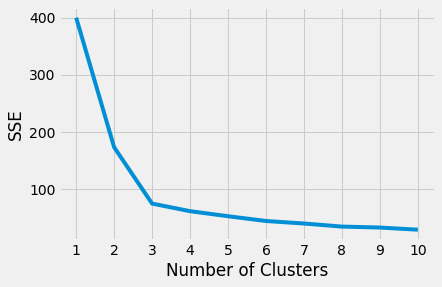

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

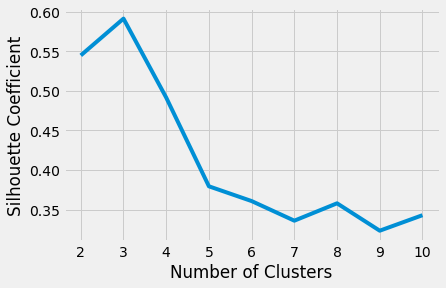

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [3]:
import numpy as np
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [8]:
x1 = np.array([1,1])
x2 = np.array([2,2])

euclidean_distance(x1, x2)

1.4142135623730951

In [23]:
np.empty([2,2])

array([[2.31584178e+077, 2.31584178e+077],
       [1.48219694e-323, 4.17201348e-309]])

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from kmeans import KMeans

X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

clusters = len(np.unique(y))
print('K is', clusters)

K is 4


In [3]:
type(X[0])

numpy.ndarray

In [8]:
test = np.array(np.random.random((10,2)))

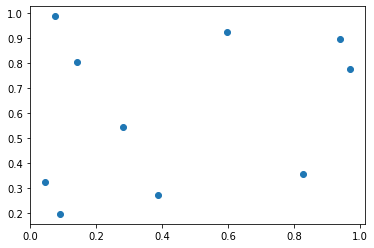

In [12]:
plt.scatter(test[:,0], test[:,1])

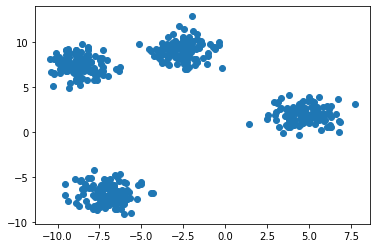

In [14]:
plt.scatter(X[:,0], X[:,1])